In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from sympy import init_printing, symbols, Matrix

In [2]:
init_printing(use_unicode=True)

### Problem 9.4 p.9-29

In [3]:
# Define the function
def f(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4)

In [18]:
# Define the gradient

def d_f_1(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * (2*x1 -1)
    
def d_f_2(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * (4*x2)

def d_f(x1, x2):
    return np.array([d_f_1(x1, x2), d_f_2(x1, x2)]).reshape(2, 1)

In [19]:
# Define the hessian

def d2_f_11(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * (4*(x1**2) - 4*x1 + 3)

def d2_f_22(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * (16*(x2**2) + 4)

def d2_f_21(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * ((2*x1 - 1) * 4*x2)

def d2_f_12(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * ((2*x1 - 1) * 4*x2)

def d2_f(x1, x2):
    return np.array([d2_f_11(x1, x2), d2_f_12(x1, x2), d2_f_21(x1, x2), d2_f_22(x1, x2)]).reshape(2, 2)

In [20]:
# Define the initale point
x = [np.array([1, -2]).reshape(2, 1)]

In [21]:
# Calculate the next point
for i in range(15):
    x.append(x[i] - np.matmul(linalg.inv(d2_f(x[i][0][0], x[i][1][0])), d_f(x[i][0][0], x[i][1][0])))

Text(0.5, 1.0, "Newton's method for optimization")

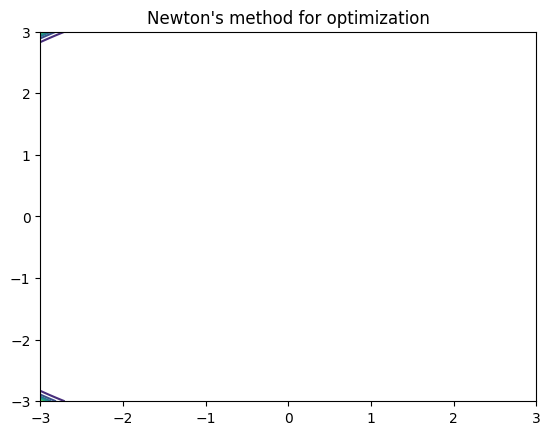

In [22]:
# Plot the function with the approximations

X = np.linspace(-3, 3, 1000)
Y = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.set_title('Newton\'s method for optimization')

### Problem 9.5 p.9-31 

In [23]:
# Define the variables
x1, x2 = symbols('x_1 x_2')
x = Matrix([x1, x2])
al = 0.1

A = Matrix([[1, -1], [-1, 1]])

f = 1/2 * x.dot(A * x) 

In [24]:
df = Matrix([f.diff(i) for i in x])
d2f = Matrix([f.diff(i).diff(j) for j in x for i in x]).reshape(2, 2)

In [25]:
# Create function to calculate gradient at given x
def dfx(x1_, x2_):
    return df.subs([(x1, x1_), (x2, x2_)])

In [26]:
# Solve using Newtons method 
u = [(1, 0)]
# As A is not invertible, a stationary point 
# for the function does not exist
# u.append(u[0] - d2f**-1 * dfx(*u[0]))

In [27]:
# Solve using gradient descent
# Using alpha = 0.1
u = [Matrix([1, 0])]
for i in range(20):
    u.append(u[i] - al * dfx(u[i][0], u[i][1]))

In [28]:
u

⎡⎡1⎤  ⎡0.9⎤  ⎡0.82⎤  ⎡0.756⎤  ⎡0.7048⎤  ⎡0.66384⎤  ⎡0.631072⎤  ⎡0.6048576⎤  ⎡0.58388608⎤  ⎡0.567108864⎤  ⎡0.5536870912⎤  ⎡0.54294967296⎤  ⎡0.
⎢⎢ ⎥, ⎢   ⎥, ⎢    ⎥, ⎢     ⎥, ⎢      ⎥, ⎢       ⎥, ⎢        ⎥, ⎢         ⎥, ⎢          ⎥, ⎢           ⎥, ⎢            ⎥, ⎢             ⎥, ⎢  
⎣⎣0⎦  ⎣0.1⎦  ⎣0.18⎦  ⎣0.244⎦  ⎣0.2952⎦  ⎣0.33616⎦  ⎣0.368928⎦  ⎣0.3951424⎦  ⎣0.41611392⎦  ⎣0.432891136⎦  ⎣0.4463129088⎦  ⎣0.45705032704⎦  ⎣0.

534359738368⎤  ⎡0.5274877906944⎤  ⎡0.52199023255552⎤  ⎡0.517592186044416⎤  ⎡0.514073748835533⎤  ⎡0.511258999068426⎤  ⎡0.509007199254741⎤  ⎡0.
            ⎥, ⎢               ⎥, ⎢                ⎥, ⎢                 ⎥, ⎢                 ⎥, ⎢                 ⎥, ⎢                 ⎥, ⎢  
465640261632⎦  ⎣0.4725122093056⎦  ⎣0.47800976744448⎦  ⎣0.482407813955584⎦  ⎣0.485926251164467⎦  ⎣0.488741000931574⎦  ⎣0.490992800745259⎦  ⎣0.

507205759403793⎤  ⎡0.505764607523034⎤⎤
               ⎥, ⎢                 ⎥⎥
492794240596207⎦  ⎣0.494235392476966⎦⎦

### Problem 9.6 p.9-32

In [29]:
# Define the variables
x1, x2 = symbols('x_1 x_2')
x = Matrix([x1, x2])

f = x1**3 + x1*x2 - (x1**2)*(x2**2)

In [30]:
df = Matrix([f.diff(i) for i in x])
d2f = Matrix([f.diff(i).diff(j) for j in x for i in x]).reshape(2, 2)

In [31]:
def fx(x1_, x2_):
    return f.subs([(x1, x1_), (x2, x2_)])
def dfx(x1_, x2_):
    return df.subs([(x1, x1_), (x2, x2_)])

def d2fx(x1_, x2_):
    return d2f.subs([(x1, x1_), (x2, x2_)])

In [32]:
df, d2f

⎛⎡    2          2     ⎤  ⎡           2              ⎤⎞
⎜⎢3⋅x₁  - 2⋅x₁⋅x₂  + x₂⎥  ⎢6⋅x₁ - 2⋅x₂   -4⋅x₁⋅x₂ + 1⎥⎟
⎜⎢                     ⎥, ⎢                          ⎥⎟
⎜⎢         2           ⎥  ⎢                      2   ⎥⎟
⎝⎣   - 2⋅x₁ ⋅x₂ + x₁   ⎦  ⎣-4⋅x₁⋅x₂ + 1     -2⋅x₁    ⎦⎠

In [33]:
u = [Matrix([1, 1])]

u.append(u[0] - d2fx(*u[0])**-1 * dfx(*u[0]))

In [34]:
u[1].evalf()

⎡0.588235294117647⎤
⎢                 ⎥
⎣1.11764705882353 ⎦

In [35]:
dx = Matrix([x1, x2]) - u[0]
f2 = fx(*u[0]) + dfx(*u[0]).dot(dx) + 1/2 * dx.dot(d2fx(*u[0]) * dx)

In [36]:
f2

### Problem 9.7 p.9.34

In [37]:
# Initialize the variables
x1, x2 = symbols('x_1 x_2')
x = Matrix([x1, x2])

A = Matrix([[10, 2], [2, 4]])
d = Matrix([-2, -1])
c = 0.24

f = c + d.dot(x) + 1/2 * x.dot(A*x)

In [38]:
df = Matrix([f.diff(i) for i in x])
d2f = Matrix([f.diff(i).diff(j) for j in x for i in x]).reshape(2, 2)

In [39]:
def dfx(x1_, x2_):
    return df.subs([(x1, x1_), (x2, x2_)])

def d2fx(x1_, x2_):
    return d2f.subs([(x1, x1_), (x2, x2_)])

def calcalpha(g, p):
    return -(g.dot(p)) / p.dot(A * p)

In [40]:
u = [Matrix([1, 1])]
p = [-dfx(*u[0])]
g = [dfx(*u[0])]

u.append(u[0] + calcalpha(g[0], p[0]) * p[0])
p

⎡⎡-10.0⎤⎤
⎢⎢     ⎥⎥
⎣⎣-5.0 ⎦⎦

In [41]:
g

⎡⎡10.0⎤⎤
⎢⎢    ⎥⎥
⎣⎣5.0 ⎦⎦

In [42]:
u

⎡⎡1⎤  ⎡0.0384615384615384⎤⎤
⎢⎢ ⎥, ⎢                  ⎥⎥
⎣⎣1⎦  ⎣0.519230769230769 ⎦⎦

In [43]:
for i in range(len(x)-1):
    g.append(dfx(*u[i+1]))
    beta = g[i+1].dot(g[i+1]) / g[i].dot(g[i])
    p.append(-g[i+1] + beta*p[i])
    u.append(u[i+1] + calcalpha(g[i+1], p[i+1])*p[i+1])

In [44]:
u

⎡⎡1⎤  ⎡0.0384615384615384⎤  ⎡0.166666666666667⎤⎤
⎢⎢ ⎥, ⎢                  ⎥, ⎢                 ⎥⎥
⎣⎣1⎦  ⎣0.519230769230769 ⎦  ⎣0.166666666666667⎦⎦